In [61]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier #분류
from sklearn.neighbors import KNeighborsRegressor  #회귀 예측
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import oracledb
import random
import glob,os.path,re
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [62]:
perch_length=np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
)

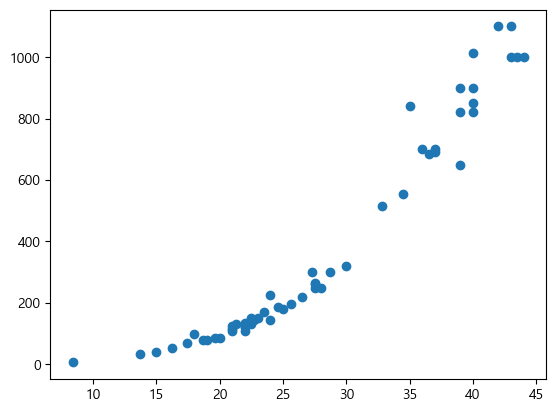

In [63]:
# 그래프구현(0의 데이터가 있는 지 직선의 모양이 어떤 지를 확인)
plt.scatter(perch_length,perch_weight)

In [64]:
# 데이터 전처리 - train,test 구성
# random_state = 42 : 랜덤으로 섞는 것을 고정시켜서 예측률이 고정됨
train_input,test_input,train_target,test_target = train_test_split(
    perch_length, perch_weight,random_state=42
)

데이터 전처리

In [65]:
# 1차원 train_input, test_input -> 2차원 행렬로 변경 reshape(-1,1)
# 2개 이상의 특성값을 가지면 2차원 행렬이 되어 reshape할 필요가 없음
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
test_input

array([[ 8.4],
       [18. ],
       [27.5],
       [21.3],
       [22.5],
       [40. ],
       [30. ],
       [24.6],
       [39. ],
       [21. ],
       [43.5],
       [16.2],
       [28. ],
       [27.3]])

데이터 훈련시키기

In [66]:
# 데이터 훈련시키기
knr = KNeighborsRegressor() # knn회귀  - 예측 알고리즘을 사용
knr.fit(train_input,train_target)


KNeighborsRegressor()

예측하기

In [67]:
predict = knr.predict(test_input)
print('예측 값: ',predict)

예측 값:  [  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]


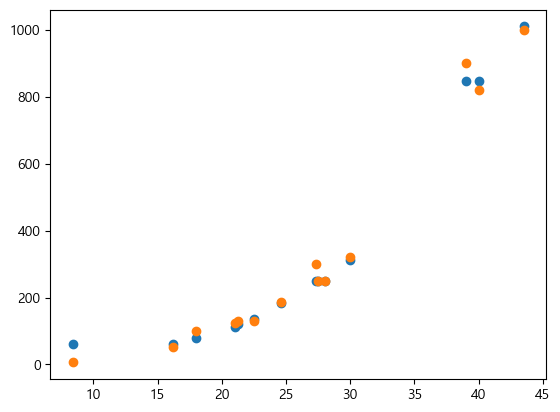

In [68]:
plt.scatter(test_input,predict) #파란색 - 예측값
plt.scatter(test_input,test_target) #주황색 -실제값

예측률 구하기

In [69]:
# 예측률 구하기
# 과소적합이 되었다고 판단. n_neighbors 갯수를 줄임
score = knr.score(test_input,test_target)
print('test 예측률: ',score)
score = knr.score(train_input,train_target)
print('train 예측률: ',score)

test 예측률:  0.992809406101064
train 예측률:  0.9698823289099254


In [70]:
knr.n_neighbors = 3 #5개에서 3개로 줄임
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [71]:
#  n_neighbors 갯수를 줄인 뒤
score = knr.score(test_input,test_target)
print('test 예측률: ',score)
score = knr.score(train_input,train_target)
print('train 예측률: ',score)

test 예측률:  0.9746459963987609
train 예측률:  0.9804899950518966


In [72]:
predict = knr.predict([[16.8]])
print(predict)

[62.66666667]


In [73]:
# 5부터 5의 배수로 45까지 해서 (9가지) 길이를 예측해서 
# 그래프로 출력
# train_input, train_target 데이터를 scatter로 출력

In [76]:
# x = np.arange(5,45+1,5)
x = np.array([5,10,15,20,25,30,35,40,45]).reshape(-1,1)
x


array([[ 5],
       [10],
       [15],
       [20],
       [25],
       [30],
       [35],
       [40],
       [45]])

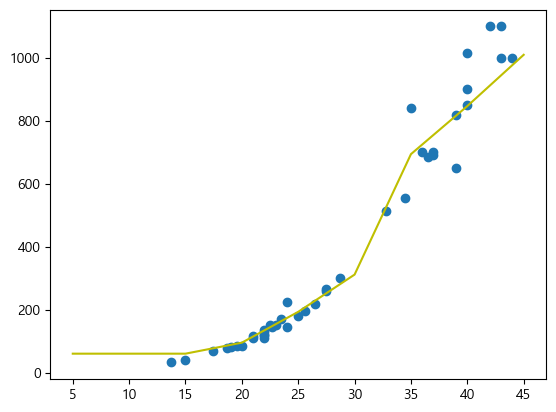

In [77]:
knr.n_neighbors = 3
knr = KNeighborsRegressor()
knr.fit(train_input,train_target)
predict = knr.predict(x)
plt.scatter(train_input,train_target)
plt.plot(x,predict,color='y')